In [1]:
#IMPORTS
import os
import cv2
import numpy as np
import pandas as pd
from model_detector import Detector
from model_comparator import Comparator
from NMS import NMS
import torch
from PIL import Image
from IPython.display import display

In [2]:
#DETECTOR
detector = Detector()
detector.load('Detector/detector.pth')

In [3]:
#COMPARATOR
comparator = Comparator()
comparator.load_state_dict(torch.load('Comparator/comparator.pth', map_location='cpu'))

<All keys matched successfully>

In [4]:
#you can test detector with show=True
path_test = 'Detector/image.jpg'
scale_percent = 100
out = detector.test(path_test, scale_percent=scale_percent, show=True)

In [5]:
#Non-maximum Supression
nms = NMS(0.25, 0.1)

In [6]:
#GET BOXES AFTER NMS
boxes = torch.cat((out['boxes'], out['scores'].view(-1,1)), axis=1).to(torch.float)
boxes = np.array(nms.nms(boxes))

In [7]:
#PLOT NEW BOXES
img = cv2.imread(path_test)
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
for box in boxes:
    cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), (255,0,0), 1)
cv2.imshow('image', img)
cv2.waitKey(0)

-1

In [8]:
#CROP FACES
img = Image.open(path_test)
h, w = img.size
img = img.resize((int(h*scale_percent/100), int(w*scale_percent/100)))

faces = []
for box in boxes:
    faces.append(img.crop(box.astype(int)+[0,0,0,0]))
print(f'Number of cropped faces: {len(faces)}')

Number of cropped faces: 27


In [9]:
#CROPPED FACES
faces[4]

In [10]:
#FIND THE MOST SIMILAR FACES
path_your_face = 'Comparator/you.jpg'
you = Image.open(path_your_face)

scores = []
for face in faces:
    scores.append(comparator.similarity(face, you))

Face number: 12, with score: 0.070


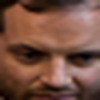

Face number: 16, with score: 0.085


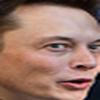

Face number: 4, with score: 0.180


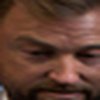

Face number: 21, with score: 0.344


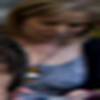

Face number: 25, with score: 0.394


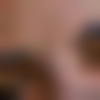

In [12]:
#TOP FACES
your_faces = []
for score in sorted(scores)[:5]:
    print(f'Face number: {scores.index(score)}, with score: {scores[scores.index(score)]:.3f}')
    your_faces.append(faces[scores.index(score)])
    display(faces[scores.index(score)].resize((100,100), Image.ANTIALIAS))